In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
import random
import tensorflow_datasets as tfds


In [191]:
ds, info = tfds.load('mnist', split='train', with_info=True)

df = tfds.as_dataframe(ds.take(50000), info)

In [320]:
df.image[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [192]:
X = df.image
y = df.label

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X.to_list()), y, test_size=0.33, random_state=42)

In [194]:
shape = X_train.shape[1:]
shape

(28, 28, 1)

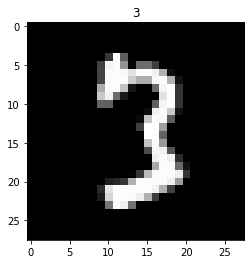

In [318]:
rand = random.randint(0,len(X))
plt.imshow(X[rand], cmap = plt.cm.gray)
plt.title(y[rand])
plt.show()

In [198]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
              
             )

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              patience=3)

history = model.fit(X_train, y_train,epochs = 100, validation_data = (X_test, y_test), callbacks = [callback])

Epoch 1/100
1047/1047 [==============================] - 12s 12ms/step - loss: 0.3031 - accuracy: 0.9048 - val_loss: 0.1251 - val_accuracy: 0.9601
Epoch 2/100
1047/1047 [==============================] - 13s 12ms/step - loss: 0.1065 - accuracy: 0.9669 - val_loss: 0.0952 - val_accuracy: 0.9718
Epoch 3/100
1047/1047 [==============================] - 13s 13ms/step - loss: 0.0771 - accuracy: 0.9754 - val_loss: 0.0875 - val_accuracy: 0.9733
Epoch 4/100
1047/1047 [==============================] - 15s 15ms/step - loss: 0.0611 - accuracy: 0.9806 - val_loss: 0.0860 - val_accuracy: 0.9743
Epoch 5/100
1047/1047 [==============================] - 15s 14ms/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.0823 - val_accuracy: 0.9757
Epoch 6/100
1047/1047 [==============================] - 15s 15ms/step - loss: 0.0430 - accuracy: 0.9858 - val_loss: 0.0696 - val_accuracy: 0.9793
Epoch 7/100
1047/1047 [==============================] - 19s 19ms/step - loss: 0.0349 - accuracy: 0.9881 - val_loss: 0

In [199]:
model.evaluate(X_test,y_test)

516/516 [==============================] - 2s 3ms/step - loss: 0.1049 - accuracy: 0.9733


[0.1049419716000557, 0.9733333587646484]

In [265]:
test_preds = model.predict(X_test)
test_preds_num = [tf.argmax(x).numpy() for x in test_preds]

(16500, 16500)

In [201]:
from confusion_matrix import make_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_preds_num)

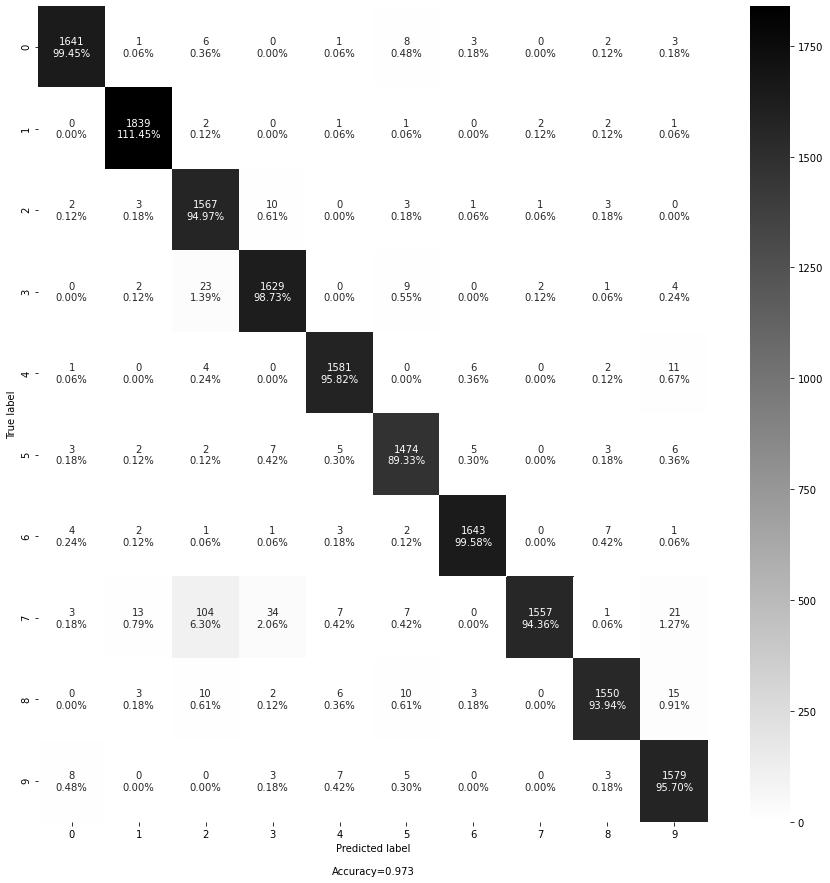

In [202]:
import seaborn as sns


make_confusion_matrix(cm, 
                      cmap= 'binary',
                      figsize = (15,15))

plt.show()

In [304]:
def classify_random():
    plt.figure(figsize = (10,10))

    for i in range(9):

        rand = random.randint(0,len(y_test))

        ax = plt.subplot(3,3,i+1)

        index = rand
        plt.axis(False)



        plt.imshow(X_test[index], cmap = plt.cm.binary)

        if test_preds_num[index] == list(y_test)[index]:
            color = 'green' 
        else:
            color = 'red'

        plt.title(f"predict:{test_preds_num[index]}\nreal: {list(y_test)[index]}", color = color)


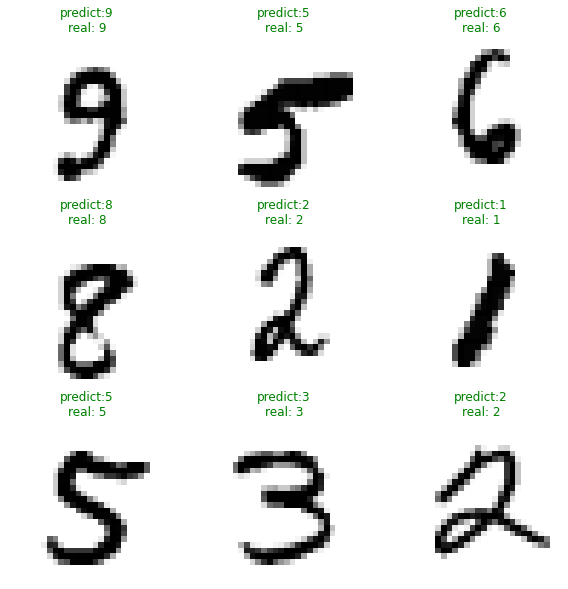

In [339]:
classify_random()